# Bootstrapping and CV

So we covered why and how we need to use cross validation in our model evaluation phase. The other technic to consider is bootstrapping - which means your train your model(s) in multiple recursive rounds, and every round (compared to the previous round) you add __one__ more feature into your feature list. In this way you can control if the latest feature would help or undermine the modeling performance.

Let's see that in action.

In [0]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

In [2]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
import pandas as pd
bc_df = pd.DataFrame(data.data, columns=data.feature_names)
bc_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
bc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

The values are in different ranges so that we can perform scaling on them.

In [6]:
from sklearn.preprocessing import StandardScaler
#from sklearn.impute import SimpleImputer
scaled_values = StandardScaler().fit_transform(bc_df)
scaled_df = pd.DataFrame(scaled_values, columns=data.feature_names)
scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,-3.162867e-15,1.00088,-2.029648,-0.689385,-0.215082,0.469393,3.971288
mean texture,569.0,-6.530609e-15,1.00088,-2.229249,-0.725963,-0.104636,0.584176,4.651889
mean perimeter,569.0,-7.078891e-16,1.00088,-1.984504,-0.691956,-0.235980,0.499677,3.976130
mean area,569.0,-8.799835e-16,1.00088,-1.454443,-0.667195,-0.295187,0.363507,5.250529
mean smoothness,569.0,6.132177e-15,1.00088,-3.112085,-0.710963,-0.034891,0.636199,4.770911
mean compactness,569.0,-1.120369e-15,1.00088,-1.610136,-0.747086,-0.221940,0.493857,4.568425
mean concavity,569.0,-4.421380e-16,1.00088,-1.114873,-0.743748,-0.342240,0.526062,4.243589
mean concave points,569.0,9.732500e-16,1.00088,-1.261820,-0.737944,-0.397721,0.646935,3.927930
mean symmetry,569.0,-1.971670e-15,1.00088,-2.744117,-0.703240,-0.071627,0.530779,4.484751
mean fractal dimension,569.0,-1.453631e-15,1.00088,-1.819865,-0.722639,-0.178279,0.470983,4.910919


In [8]:
# define the feature list to select from
feature_lst = data.feature_names
#type(feature_lst)
feature_lst

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [0]:
import warnings
warnings.filterwarnings('ignore')

We want to random shuffle the feature list since the order of features added to training may impact the results.

In [21]:
import numpy as np
np.random.shuffle(feature_lst)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold

selected_features = []
lr = LogisticRegression(penalty='l2',dual=False,max_iter=110)

for feat in feature_lst:
  selected_features.append(feat)
  X = scaled_df[selected_features]
  y = data.target
  #lr.fit(X,y)
  kfold = KFold(n_splits=5, random_state=2020)
  f1_scores = cross_val_score(lr, X, y, cv=kfold, scoring='f1')
  roc_scores = cross_val_score(lr, X, y, cv=kfold, scoring='roc_auc')
  print('Current selected features', selected_features)
  print('\n')
  print('average f1 score (bias)', f1_scores.mean())
  print('average f1 score (variance)', f1_scores.std())
  print('average AUC score (bias)', roc_scores.mean())
  print('average AUC score (variance)', roc_scores.std())
  print('\n')

Current selected features ['fractal dimension error']


average f1 score (bias) 0.754413934204042
average f1 score (variance) 0.10869017432978023
average AUC score (bias) 0.6165368619091233
average AUC score (variance) 0.028020881667401343


Current selected features ['fractal dimension error', 'mean smoothness']


average f1 score (bias) 0.7537144225506294
average f1 score (variance) 0.09100383233980322
average AUC score (bias) 0.7095332833548285
average AUC score (variance) 0.060781776568286316


Current selected features ['fractal dimension error', 'mean smoothness', 'worst perimeter']


average f1 score (bias) 0.9371335054586083
average f1 score (variance) 0.04377908120195588
average AUC score (bias) 0.9871261747973602
average AUC score (variance) 0.005655870496679099


Current selected features ['fractal dimension error', 'mean smoothness', 'worst perimeter', 'compactness error']


average f1 score (bias) 0.9331881737482555
average f1 score (variance) 0.044876072558662966
average 

Alternatively, instead of randomly adding the features to the list, we can add the feature by the ranking of the feature importance scores.

In [36]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=5)
rf_model.fit(scaled_df.values, data.target)
sorted_idx = rf_model.feature_importances_.argsort()
ranked_features = data.feature_names[sorted_idx]
ranked_features

array(['mean concavity', 'mean fractal dimension', 'mean texture',
       'worst concavity', 'worst fractal dimension', 'concavity error',
       'mean perimeter', 'area error', 'mean compactness', 'radius error',
       'concave points error', 'perimeter error', 'mean radius',
       'mean smoothness', 'worst texture', 'smoothness error',
       'mean area', 'worst radius', 'texture error', 'worst area',
       'fractal dimension error', 'compactness error', 'mean symmetry',
       'worst compactness', 'worst perimeter', 'symmetry error',
       'mean concave points', 'worst symmetry', 'worst smoothness',
       'worst concave points'], dtype='<U23')

In [39]:
selected_features = []
lr = LogisticRegression(penalty='l2',dual=False,max_iter=110)

f1_mean_series = []
f1_std_series = []
auc_mean_series = []
auc_std_series = []

for feat in ranked_features:
  selected_features.append(feat)
  X = scaled_df[selected_features]
  y = data.target
  #lr.fit(X,y)
  kfold = KFold(n_splits=5, random_state=2020)
  f1_scores = cross_val_score(lr, X, y, cv=kfold, scoring='f1')
  roc_scores = cross_val_score(lr, X, y, cv=kfold, scoring='roc_auc')
  print('Current selected features', selected_features)
  print('\n')
  print('average f1 score (bias)', f1_scores.mean())
  f1_mean_series.append(f1_scores.mean())
  print('average f1 score (variance)', f1_scores.std())
  f1_std_series.append(f1_scores.std())
  print('average AUC score (bias)', roc_scores.mean())
  auc_mean_series.append(roc_scores.mean())
  print('average AUC score (variance)', roc_scores.std())
  auc_std_series.append(roc_scores.std())
  print('\n')

Current selected features ['mean concavity']


average f1 score (bias) 0.8871273749147234
average f1 score (variance) 0.057663013759442654
average AUC score (bias) 0.9400978321053788
average AUC score (variance) 0.020987999350863405


Current selected features ['mean concavity', 'mean fractal dimension']


average f1 score (bias) 0.9141410084075969
average f1 score (variance) 0.06587163105150683
average AUC score (bias) 0.9628268968164463
average AUC score (variance) 0.023685083711372474


Current selected features ['mean concavity', 'mean fractal dimension', 'mean texture']


average f1 score (bias) 0.9170981551288954
average f1 score (variance) 0.058534545871978594
average AUC score (bias) 0.9698729072680541
average AUC score (variance) 0.018082333116648995


Current selected features ['mean concavity', 'mean fractal dimension', 'mean texture', 'worst concavity']


average f1 score (bias) 0.9170025260063829
average f1 score (variance) 0.05422707808430002
average AUC score (bias) 0.97

In [42]:
eval_df = pd.DataFrame([f1_mean_series, f1_std_series, auc_mean_series, auc_std_series]).T
eval_df.columns=['F1-bias', 'F1-variance', 'AUC-bias', 'AUC-variance']
eval_df

,F1-bias,F1-variance,AUC-bias,AUC-variance
0,0.887127,0.057663,0.940098,0.020988
1,0.914141,0.065872,0.962827,0.023685
2,0.917098,0.058535,0.969873,0.018082
3,0.917003,0.054227,0.971683,0.017691
4,0.928414,0.043572,0.972343,0.015821
5,0.939594,0.032559,0.984518,0.009427
6,0.948312,0.030992,0.989647,0.006722
7,0.965614,0.021768,0.993256,0.004320
8,0.965614,0.021768,0.993203,0.004284
9,0.958295,0.024784,0.993280,0.004324


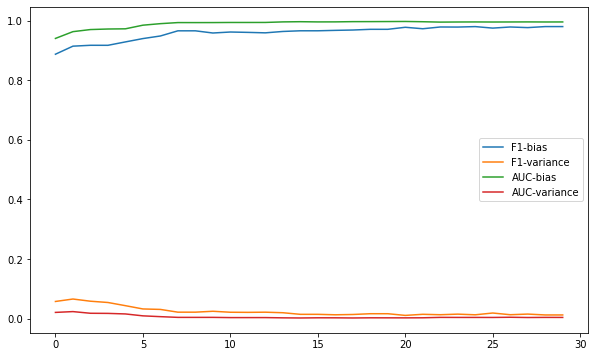

In [46]:
eval_df.plot(figsize=(10,6))

In [45]:
ranked_features[:19]

array(['mean concavity', 'mean fractal dimension', 'mean texture',
       'worst concavity', 'worst fractal dimension', 'concavity error',
       'mean perimeter', 'area error', 'mean compactness', 'radius error',
       'concave points error', 'perimeter error', 'mean radius',
       'mean smoothness', 'worst texture', 'smoothness error',
       'mean area', 'worst radius', 'texture error'], dtype='<U23')

We can observe that the improvement in terms of AUC is not significant after adding the `20th` feature in `ranked_features`.